# Avaliação de Redes Complexas

Nome: Olavo Morais Borges Pereira 11297792

<hr>

**1 -** (a) Crie o gráfo a seguir usando a biblioteca networkx e mostre o gráfo.<br>
Link para visualizar o grafo: https://commons.wikimedia.org/wiki/File:6n-graf.png<br>

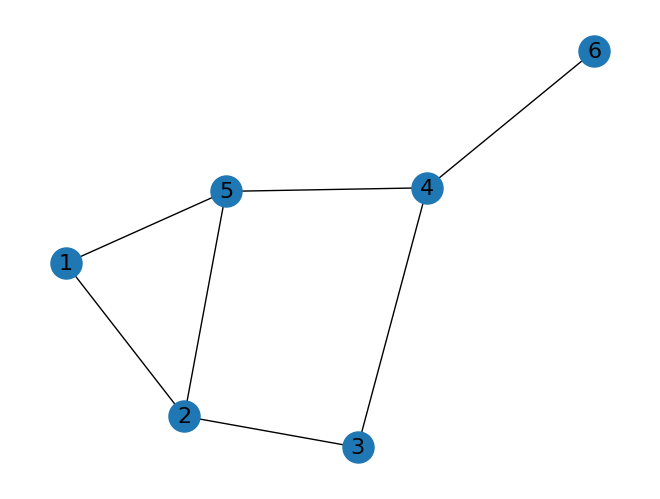

In [ ]:
#Inclui as bibliotecas utilizadas
import networkx as nx
import matplotlib.pyplot as plt

#Cria o grafo
G=nx.Graph();

#Adiciona os nós
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

#Adiciona as arestas entre os nós
G.add_edge(1,2)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(4,6)

#Define como o grafo será exibido
pos=nx.spring_layout(G)
nx.draw(G,with_labels=True,node_size=500,font_size=16,pos=pos)
plt.show(True)

(b) Simule uma caminha aleatória nesse grafo e monte uma matriz onde o elemento Mij representa o número de visitas ao vértice j dado que a caminhada iniciou em i. Considere pelo menos 100 passos. Compare o número de visitas com a medida eigenvector centrality de cada vértice.

In [ ]:
import numpy as np
from scipy.stats import pearsonr
import random

#Cria a Matriz M com todos elementos iguais a zero
M=np.zeros(shape=(6,6))

n_passos=100;
for i in range(1,7):#Para todo nó do grafo, i varia de 1 a 6
  no_atual=i
  for j in range(0,n_passos):#Executa esse laço n_passos vezes
    no_prox=random.choice(list(G.neighbors(no_atual)))#Escolhe aleatoriamente um vizinho
    M[i-1][no_prox-1]=M[i-1][no_prox-1]+1 #Atualiza a matriz
    no_atual=no_prox

print(M)#Exibe a Matriz

eigenvector=list(nx.eigenvector_centrality(G).values())#Calcula o eigenvector
print(eigenvector)

print(pearsonr(np.mean(M,axis=0),eigenvector))#Calcula a correlação de Pearson entre o eigenvector centrality e a média de visitas de um nó

[[21. 16. 11. 20. 27.  5.]
 [11. 19. 19. 23. 23.  5.]
 [11. 20. 20. 24. 20.  5.]
 [16. 23. 12. 17. 28.  4.]
 [13. 17. 11. 27. 20. 12.]
 [16. 26. 13. 15. 24.  6.]]
[0.40109628015120613, 0.5023280877603374, 0.35830784164631824, 0.4075878178953184, 0.516251205914231, 0.16050115266283904]
PearsonRResult(statistic=0.9388508178279649, pvalue=0.005494508522148024)


O número de visitas que um nó recebe é diretamente proporcional ao seu eigenvector centrality

**2 -** (a) Leia a rede do arquivo advogato.txt e mostre a distribuição acumulada complementar do grau, isto é, $P(K > k)$.

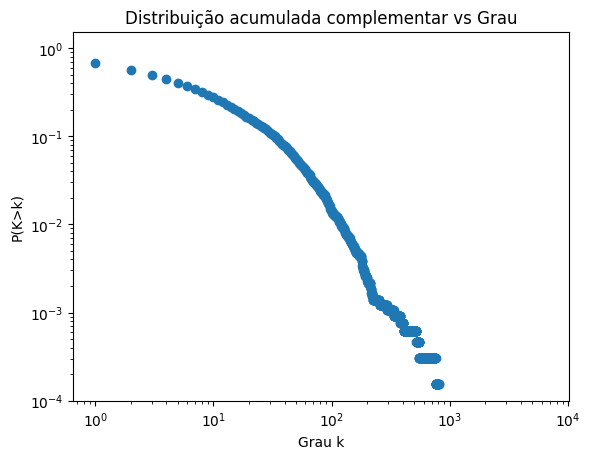

In [ ]:
#lê o arquivo e armazena as arestas em um array arestas
with open("advogato.txt", 'r') as file:
  arestas=[]
  for linha in file:
    vertices=linha.strip().split()
    arestas.append((vertices[0],vertices[1]))

#Limpa o G e cria o grafo a partir do vetor
G.clear()
G=nx.Graph(arestas)

N=G.number_of_nodes()
contador=np.zeros(shape=(N+1))
#Calcula o grau de todos os nós e salva em um contador
for node in G.nodes():
  grau=len(list(G.neighbors(node)))
  contador[grau]=contador[grau]+1

#divide todos os elementos pelo número de nós no grafo para obter a distribuição
for i in range(0,N+1):
  contador[i]=contador[i]/N

#Define o vetor de probabilidade acumulada complementar
acumulada=np.zeros(shape=(N+1))

for i in range(N,-1,-1):
  if i==N:#A probabilidade de obter um nó com grau maior que N é zero
    acumulada[i]=0
  else:#Probabilidad de obter um nó com grau maior que k é igual a prob. de obter um nó com grau maior que k+1 + a prob. de obter um nó de grau k
    acumulada[i]=acumulada[i+1]+contador[i+1]

#Desenha o gráfico na escala log-log
plt.scatter(range(0,N+1),acumulada)
plt.xscale('log')
plt.yscale('log')

plt.title("Distribuição acumulada complementar vs Grau")
plt.ylabel("P(K>k)")
plt.xlabel("Grau k")
plt.show()


(b) Mostre o gráfico de Knn(k), ou seja, o grau médio dos vizinhos dos vértices de grau k em função do grau k.

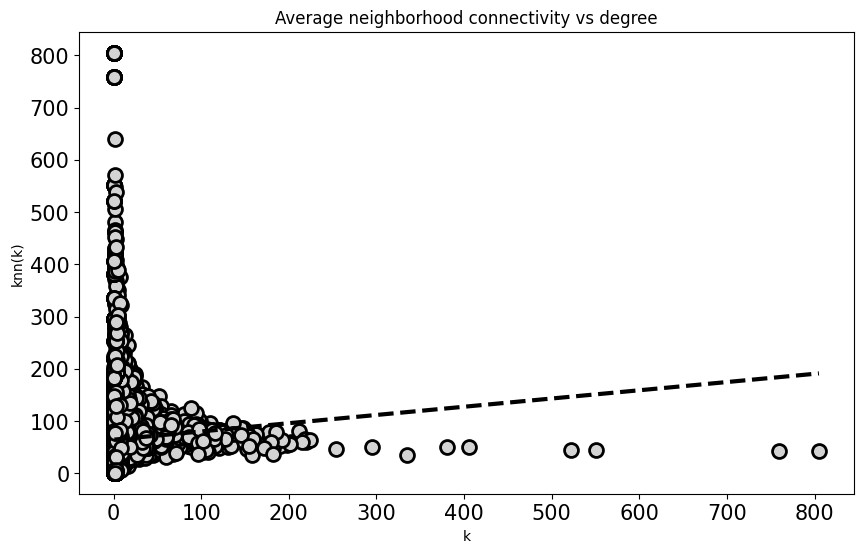

In [ ]:
array_knn=[] #Vetor que armazena o grau médio dos vizinhos
array_k=[] #vetor que armazena o grau do nó

#Para todo nó
for node in G:
  array_k.append(G.degree(node))#Armazena o grau do nó
  array_knn.append(nx.average_neighbor_degree(G,nodes=[node])[node])#Armazena o grau médio dos vizinhos


#Exibe o gráfico
fig= plt.figure(figsize=(10,6))
plt.plot(array_k, array_knn, '-o', color='gray',markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)

#Define o título e nome dos eixos
plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")

#Calcula a reta que melhor aproxima dos pontos
par = np.polyfit(array_k, array_knn, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(array_k), max(array_k)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(True) #Exibe o gráfico


(c) Calcule a matriz de menores distâncias $D$ a matriz $A^n$, que presenta o número de caminhadas de comprimento $n$ entre cada par de vértices. Faça um gráfico da correlação entre $D_{ij}$ e $A_{ij}$ para diferentes valores de $n$. Ou seja, um gráfico em que o eixo x representa n e o y, a correlação entre essas duas matrizes.

In [ ]:
#------Não consegui rodar esse algoritmo por conta do tamanho do grafo
from scipy.stats import pearsonr

#Define G como o maior componente
G=G.subgraph(max(nx.connected_components(G),key=len))
G = nx.convert_node_labels_to_integers(G,first_label=0)

#Calcula a matriz de distâncias entre todos os nós
D = nx.floyd_warshall_numpy(G)

#Calcula a matriz A^n
def calcularAn(G,n):
  A=np.zeros(shape=(G.number_of_nodes(),G.number_of_nodes()))
  contador=0
  #Percorre todos os pares i,j de nós
  for i in G.nodes():
    for j in G.nodes():
      if i!=j:#Se não for o mesmo nó
        caminhos=nx.all_simple_paths(G, i, j, cutoff=n)#Calcula o número de caminhos de tamanho entre 1 e n que liga os nós i e j
        contador=0
        for caminho in caminhos:#Para todos os caminhos encontrados
          if len(caminho)-1==n:#Se o tamanho do caminho for n arestas
            contador+=1
      A[i][j]=contador#Salva o número de caminhos entre i e j com tamanho igual a n
  return A#Retorna a matriz


diametro=nx.diameter(G) #Calcula o diâmetro do grafo, isso é, o tamanho do menor caminho entre os nós mais afastados
correlacoes=[]
for i in range(1,diametro+1):#Para todos os valores de n
  correlacoes.append(np.corrcoef(D.flatten(), calcularAn(G,i).flatten())[0,1])#Calcula a Matriz A^n e salva a correlação entre essa matriz e D

#Exibe o resultado obtido e o respectivo gráfico
print(correlacoes)
print(D)

plt.scatter(range(1,diametro+1),correlacoes)
plt.show()

<hr>

**3 -** Considere a rede do arquivo internet_routers-22july06.gml. Escreva um código que calcule as seguintes medidas: (a) grau médio, (b) transitividade, (c) segundo momento da distribuição do grau, (d) entropia de Shannon da distribuição do grau, (e) coeficiente de assortatividade. Considere apenas o maior componente. Armazene os valoes em uma lista e imprima essa lista, indicando os valores de cada medida.

In [ ]:
import math #Biblioteca necessária para calcular Log

#Lê o arquivo, converte o grafo para um grafo não direcionado, converte os labels para começar do número 0, e considera apenas o maior componente
G=nx.read_gml("internet_routers-22july06.gml")
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.convert_node_labels_to_integers(G, first_label=0)
G=G.subgraph(max(nx.connected_components(G),key=len))

#Obtém o n-ésimo momento
def obterMomento(G,n):
  aux=0
  for node in (G.nodes()):#Para todo grau
    aux+=len(list(G.neighbors(node)))**n#Incrementa a variável aux com o grau do nó elevado a n
  return aux/G.number_of_nodes();#Retorna a soma dividido pelo número de nós no grafo

#Retorna a transitividade do grafo
def calcularTransitividade(G):
  total_triangulos=0;
  triplas=0
  for node in G.nodes():#Para todo nó do grafo
    triplas+=len(list(G.neighbors(node)))*(len(list(G.neighbors(node)))-1)/2 #O número de triplas recebe o número de combinações de k, 2 a 2

    #Para todas as duplas de vizinhos do nó atual
    for i in G.neighbors(node):
      for j in G.neighbors(node):
        if i!=j and G.has_edge(i,j):#Se tiver uma aresta entre 2 vizinhos do nó atual então há 1 triângulo
          total_triangulos+=1

  total_triangulos=total_triangulos/6 #Todo triângulo é contado 6 vezes então divide por 6 para obter o número real de triângulos
  return 3*total_triangulos/triplas #Retorna a transitividade

#Retorna um vetor com o grau de cada nó
def obterGraus(G):
  aux=[]
  for node in G.nodes():
    aux.append(len(list(G.neighbors(node))))
  return aux;

#Retorna um vetor com a distribuição do grau
def calcularDistribuicaoGrau(G):
  graus=obterGraus(G)#Obtém o vetor com os graus de cada nó

  #Encontra o maior grau
  maior=graus[0]
  for i in graus:
    if i>maior:
      maior=i

  aux=np.zeros(shape=(maior+1)) #Cria um vetor para armzenar a distribuição
  for i in range(0,maior+1):
    aux[i]=graus.count(i)
    aux[i]=aux[i]/G.number_of_nodes()

  return aux #Retorna a distribuição


#Calcula a entropia de shannon
def calcularEntropiaShannon(G):

  aux=calcularDistribuicaoGrau(G)#Obtém a distribuição
  soma=0

  for i in aux:#Para cada probabilidade
    if i!=0:
      soma+=i*math.log10(i)

  return (-1)*soma #Retorna a entropia de Shannon


valores=[] #Vetor para armazenar os valores exigidos no enunciado
valores.append(obterMomento(G,1)) #Calcula o grau médio
valores.append(calcularTransitividade(G)) #Calcula a transitividade
#valores(nx.transitivity(G)) #Função da biblioteca para calcular a transitividade
valores.append(obterMomento(G,2)) #Calcula o segundo momento
valores.append(calcularEntropiaShannon(G))#Calcula a Entropia de Shannon
valores.append(nx.degree_assortativity_coefficient(G))#Calcula o coeficiente de assortatividade
print(valores)#Exibe o resultado

[4.218612550624918, 0.011146383847822162, 1103.0002177415843, 0.7121756976718259, -0.1983848751205647]


<hr>

**4 -** Simule o modelo de propagação de epidemias SIR na rede de aeroportos dos EUA (USairport_2010.txt). Calcule a correlação de Pearson entre a fração final de recuperados e as seguintes medidas de centralidade: (a) grau, (b) betweenness centrality, (c) eigenvector centrality, (d) closenness centrality. Mostre os resultados e indique a maior correlação. Considere $\beta = 0.6$ e $\mu = 0.1$ no modelo SIR.

In [ ]:
def find(v, i): # Retorna as posições que i aparece no vetor v
  l = []
  pos = 0
  for x in v:
    if(x == i):
      l.append(pos)
    pos = pos + 1
  return l

def SIR_single_seed(G, seed, beta, mu):
  print("Simulando pandemia com o nó "+str(seed)+" como paciente zero")
  N=G.number_of_nodes()

  seed_node = seed; # seed node
  vector_states = np.zeros(shape=(N)) # Armazena o estado de todos os nós
  vector_states[seed_node] = 1 # Define o estado do nó inicial como doente
  ninfected = 1
  t = 0
  infected = [seed_node] # Armazena os nós infectados
  vt = [0] # Vetor que armazena o tempo
  vI = [1/N] # Vetor armazena a proporção de infectados
  vR = [0] # Vetor que armazena a proporção de recuperados
  vS = [(N-1)/N] # Vetor que armazena o número de sucetíveis

  while ninfected > 0: #Continua enquanto tiver infectados
    infected = find(vector_states,1) #Encontra os nós infectados
    for i in infected: #Para cada infectado, tenta infectar os vizinhos
      neigs = G.neighbors(i) #Obtém os vizinhos
      for j in neigs: #Para cada vizinho
        if np.random.rand() < beta:
          if(vector_states[j] == 0): # Se o nó for suscetível
            vector_states[j] = 1 #Passa a ficar doente e incrementa o número de infectados
            ninfected+=1
    for k in infected: #Tenta recuparar os infectados
      if np.random.rand() < mu:
        vector_states[k] = 2  #Define o estado do nó como recuperado e decrementa o número de infectados
        ninfected-=1

    #Salva o tempo e as proporções
    vI.append(ninfected/N)
    vR.append(len(find(vector_states,2))/N)
    vS.append(len(find(vector_states,0))/N)
    t+=1
    vt.append(t)

    #print("Tempo: "+str(t)+", Infectados: "+str(ninfected))
  return vI, vS, vR, vt #Retorna os vetores com as proporções


#Lê o arquivo e define o grafo
with open("USairport_2010.txt", 'r') as file:
  arestas=[]
  for linha in file:
    vertices=linha.strip().split()
    arestas.append((vertices[0],vertices[1]))

G=nx.Graph(arestas)
G = nx.convert_node_labels_to_integers(G,first_label=0)


# Define as probabilidades
beta = 0.01 # Probability of infection
mu = 0.1 # Probability of recovering


aux=[] #Vetor auxiliar para armazenar a proporção de recuperados no final de cada pandemia
for i in G.nodes(): #Simula a pandemia N vezes, cada nó atuando como paciente zero
  vI,vS,vR,vT=SIR_single_seed(G,i,beta,mu)
  aux.append(vR[-1])#Armazena a proporção de recuperados quando o i-ésimo nó é o paciente zero


#Exibe o gráfico e o grafo
# plt.figure(figsize=(10,5))
# plt.plot(vt, vI, 'ro--', label='Infected')
# plt.plot(vt, vR, 'bo--', label='Recovered')
# plt.plot(vt, vS, 'go--', label='Susceptible')
# plt.xlabel("t", fontsize=15)
# plt.ylabel("Fraction of nodes", fontsize=15)
# plt.legend()
# plt.grid(True)
# plt.show(True)

#print("Total s:"+str(vS[-1])+" ,total r:"+str(vR[-1]))
# pos=nx.spring_layout(G)
# nx.draw(G,with_labels=True,node_size=500,font_size=16,pos=pos)
# plt.show(True)

#Calcula e exibe as correlações
print("correlação entre proporção de recuperados e Grau:"+str(pearsonr(aux, list(nx.degree_centrality(G).values()))))
print("correlação entre proporção de recuperados e Betweenness Centrality:"+str(pearsonr(aux, list(nx.betweenness_centrality(G).values()))))
print("correlação entre proporção de recuperados e Eigenvector Centrality:"+str(pearsonr(aux, list(nx.eigenvector_centrality(G).values()))))
print("correlação entre proporção de recuperados e Closeness Centrality:"+str(pearsonr(aux, list(nx.closeness_centrality(G).values()))))


Simulando pandemia com o nó 0 como paciente zero
Simulando pandemia com o nó 1 como paciente zero
Simulando pandemia com o nó 2 como paciente zero
Simulando pandemia com o nó 3 como paciente zero
Simulando pandemia com o nó 4 como paciente zero
Simulando pandemia com o nó 5 como paciente zero
Simulando pandemia com o nó 6 como paciente zero
Simulando pandemia com o nó 7 como paciente zero
Simulando pandemia com o nó 8 como paciente zero
Simulando pandemia com o nó 9 como paciente zero
Simulando pandemia com o nó 10 como paciente zero
Simulando pandemia com o nó 11 como paciente zero
Simulando pandemia com o nó 12 como paciente zero
Simulando pandemia com o nó 13 como paciente zero
Simulando pandemia com o nó 14 como paciente zero
Simulando pandemia com o nó 15 como paciente zero
Simulando pandemia com o nó 16 como paciente zero
Simulando pandemia com o nó 17 como paciente zero
Simulando pandemia com o nó 18 como paciente zero
Simulando pandemia com o nó 19 como paciente zero
Simulando 

O Betweenness Centrality é a medida de centralidade que possui menos correlação com a proporção final de recuperados.
É interessante notar que um valor baixo de beta causa duas coisas: a pandemia acaba mais rápido pois a chance da doença se espalhar é menor e fica mais claro que quanto mais central for um nó, mais a doença se espalha. Valores altos para beta resultam em proporção de recuperados próxima a 100% em quase todos os casos, diminuindo a correlação

<hr>

**5 -** Gere redes do tipo BA, ER e WS (p=0.05) com grau médio igual a 10 e N = 500. Desenvolva um estudo para mostrar que essas apresentam topologias diferentes. (Seja criativ@).

Usei as seguintes medidas para mostrar que os grafos possuem uma topologia diferente: Grau Médio, o gráfico com a distribuição de probabilidade, a transitividade, o diâmetro da rede, eficiência da rede e grau médio dos vizinhos(knn)

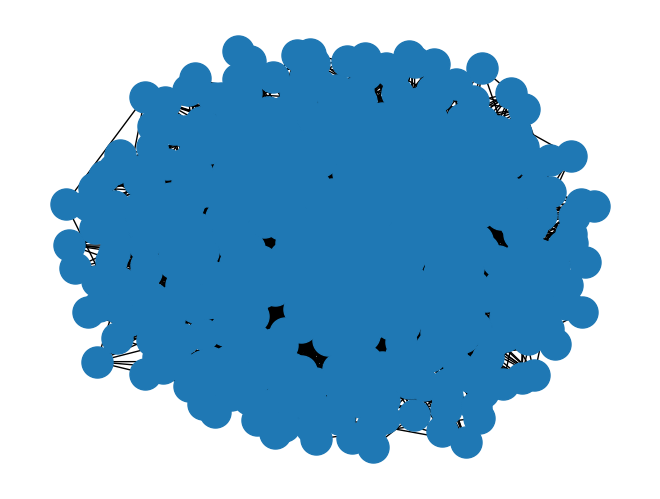

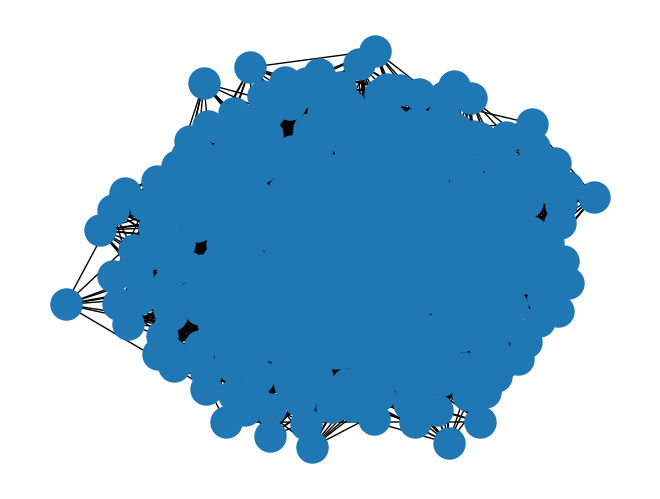

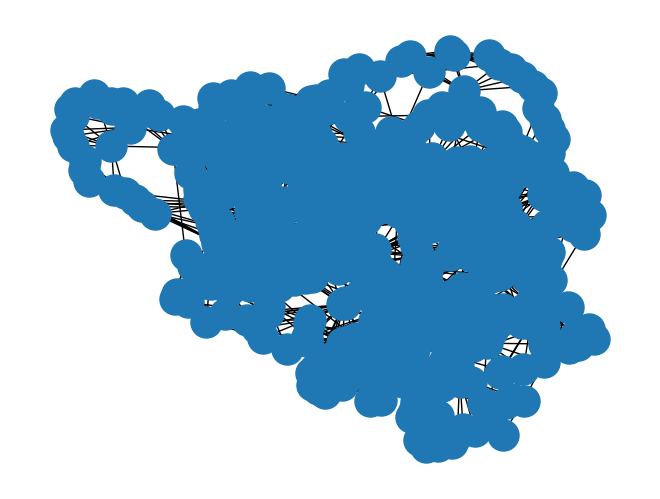

In [ ]:
#Cria os grafos de acordo com o enunciado
GBA=nx.barabasi_albert_graph(500, 10)
GER=nx.erdos_renyi_graph(500, 0.05)
GWS=nx.watts_strogatz_graph(500, 10, 0.05)

#Exibe os grafos
pos=nx.spring_layout(GBA)
nx.draw(GBA,with_labels=False,node_size=500,font_size=16,pos=pos)
plt.show(True)

pos=nx.spring_layout(GER)
nx.draw(GER,with_labels=False,node_size=500,font_size=16,pos=pos)
plt.show(True)

pos=nx.spring_layout(GWS)
nx.draw(GWS,with_labels=False,node_size=500,font_size=16,pos=pos)
plt.show(True)

Embora seja difícil visualizar os grafos, é perceptível que o grafo WS possui uma topologia mais diferente

In [ ]:
#Calcula o grau médio dos grafos
print("Grau médio:")
print("BA:"+str(obterMomento(GBA,1)))
print("ER:"+str(obterMomento(GER,1)))
print("WS:"+str(obterMomento(GWS,1)))

Grau médio:
BA:19.6
ER:24.8
WS:10.0


É notável a diferença entre o grau médio dos nós em cada grafo.

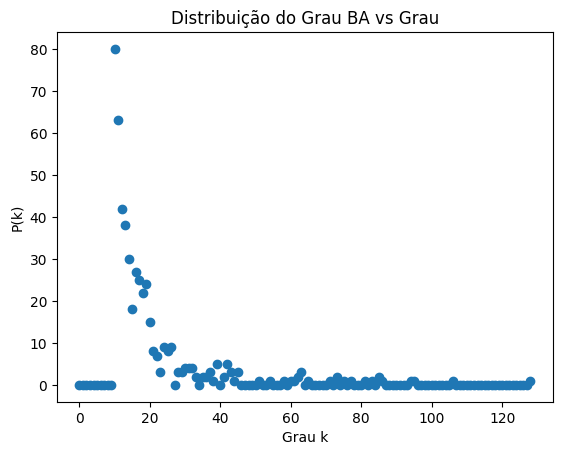

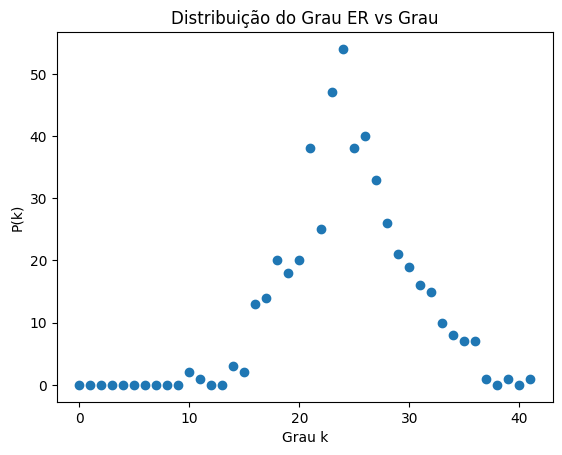

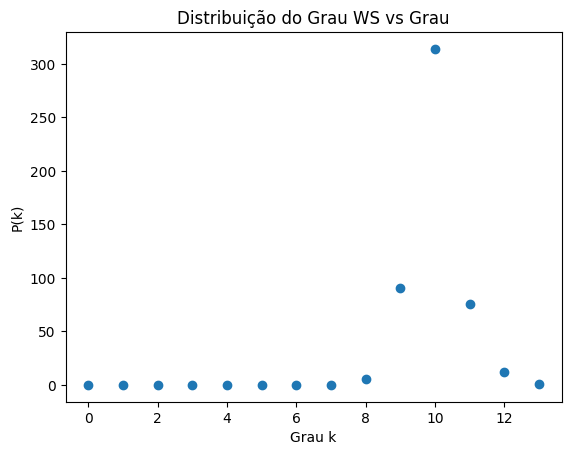

In [ ]:
#Calcula a distribuição de probabilidade do grau k
PkBA=nx.degree_histogram(GBA)
PkER=nx.degree_histogram(GER)
PkWS=nx.degree_histogram(GWS)

plt.scatter(range(0,len(PkBA)),PkBA)
plt.title("Distribuição do Grau BA vs Grau")
plt.ylabel("P(k)")
plt.xlabel("Grau k")
plt.show()

plt.scatter(range(0,len(PkER)),PkER)
plt.title("Distribuição do Grau ER vs Grau")
plt.ylabel("P(k)")
plt.xlabel("Grau k")
plt.show()

plt.scatter(range(0,len(PkWS)),PkWS)
plt.title("Distribuição do Grau WS vs Grau")
plt.ylabel("P(k)")
plt.xlabel("Grau k")
plt.show()

Percebos que o grafo BA segue a lei da potência, enquanto o grafo ER e WS seguem uma distribuição de Poisson

In [ ]:
print("Transitividade:")
print(calcularTransitividade(GBA))
print(calcularTransitividade(GER))
print(calcularTransitividade(GWS))

Transitividade:
0.0874387104070893
0.050790926290740994
0.5710686820472023


O grafo WS possui uma topologia em anel, mais favorável a formação de triângulos

In [ ]:
print("Diâmetro:")
print(nx.diameter(GBA))
print(nx.diameter(GER))
print(nx.diameter(GWS))

Diâmetro:
4
3
8


Por conta de sua topologia, o grafo WS acaba tendo maior diâmetro

In [ ]:
print("Eficiência:")
print(nx.global_efficiency(GBA))
print(nx.global_efficiency(GER))
print(nx.global_efficiency(GWS))

Eficiência:
0.4551008684026175
0.4788430193716141
0.24651129878758196


Por possuirem um grau médio maior, os grafos AB e ER possuem uma maior eficiência para transmitir a informação

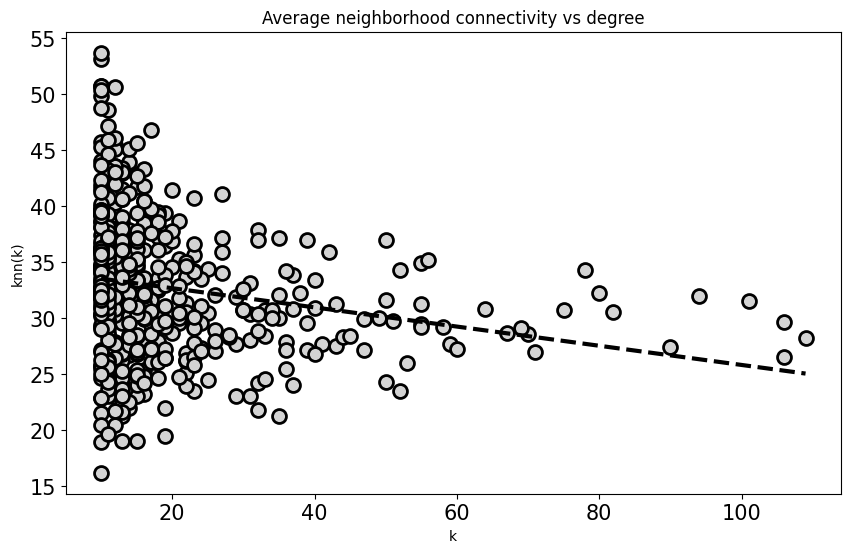

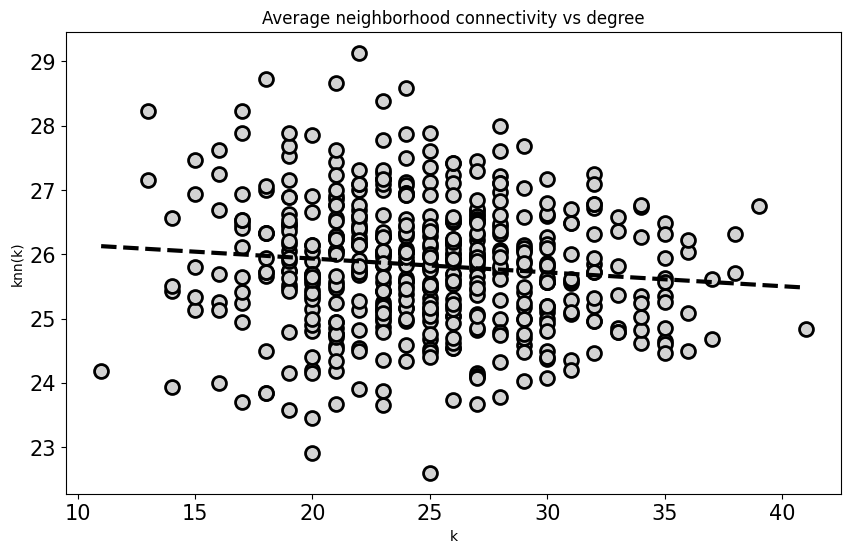

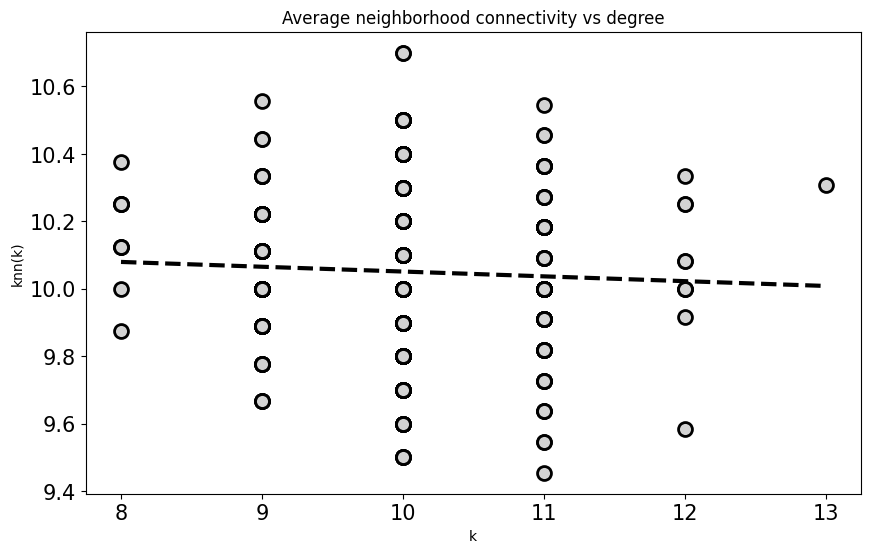

In [ ]:
#Mesmo código usado no exercício 2
def knn(G):
  array_knn=[]
  array_k=[]

  for node in G:
    array_k.append(G.degree(node))
    array_knn.append(nx.average_neighbor_degree(G,nodes=[node])[node])


  fig= plt.figure(figsize=(10,6))

  plt.plot(array_k, array_knn, '-o', color='gray',markersize=10, linewidth=0,
          markerfacecolor='lightgray',
          markeredgecolor='black',
          markeredgewidth=2)

  plt.title("Average neighborhood connectivity vs degree")
  plt.ylabel("knn(k)")
  plt.xlabel("k")

  par = np.polyfit(array_k, array_knn, 1, full=True)
  slope=par[0][0]
  intercept=par[0][1]
  xl = [min(array_k), max(array_k)]
  yl = [slope*xx + intercept  for xx in xl]
  plt.plot(xl, yl, '--', linewidth=3, color='black')
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show(True)

knn(GBA)
knn(GER)
knn(GWS)

Percebemos que o grafo WS possui um knn mais "comportado", o grafo BA segue a lei da potência e o grafo ER segue um comportamento intermediário